-----------Loading dataset-----------
First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories  parking
0  13300000  7420         4          2        3        2
1  12250000  8960         4          4        4        3
2  12250000  9960         3          2        2        2
3  12215000  7500         4          2        2        3
4  11410000  7420         4          1        2        2

-----------Dataset Info-----------:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
dtypes: int64(6)
memory usage: 25.7 KB
None

-----------Missing Values-----------:
price        0
area         0
bedrooms     0
bathrooms    0
sto

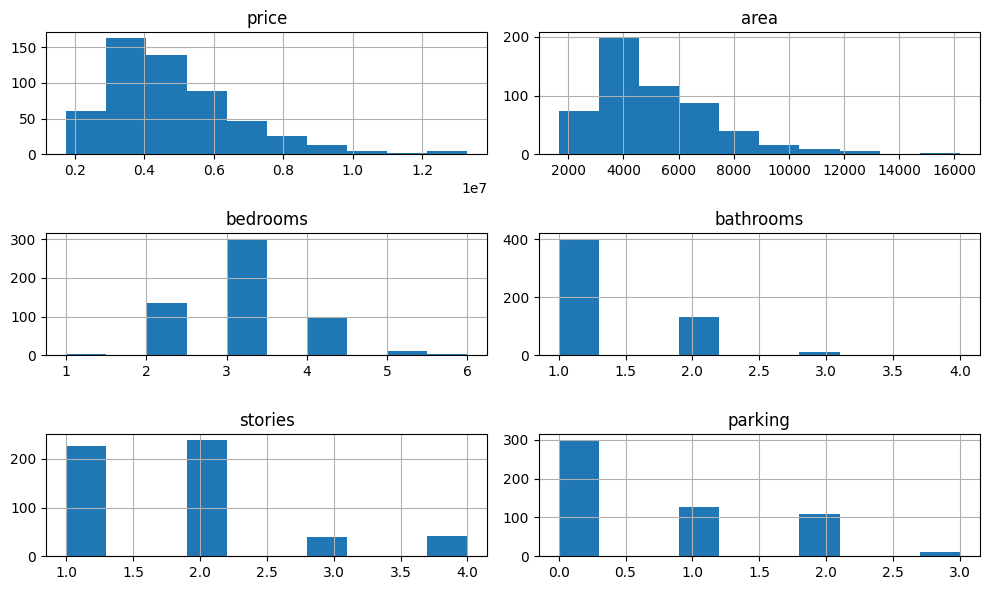


 -----------Bivariate Analysis (Correlation Heatmap)-----------:


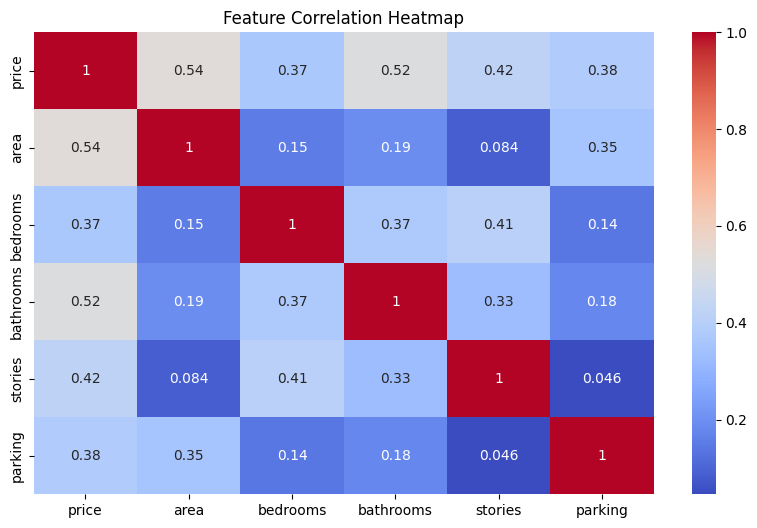


Splitting data into train and test sets...
Data split completed.

Training SVM model...
Model trained successfully.

Saving model to 'svm_model.pkl'...
Model saved successfully.


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pickle

class HousingPricePredictor:
    def __init__(self, filepath):
        self.filepath = filepath
        self.data = None
        self.model = None


    # Step 1: Data Collection and Understanding
    def load_and_understand_data(self):
        print("-----------Loading dataset-----------")
        self.data = pd.read_csv(self.filepath)
        print("First 5 rows of the dataset:")
        print(self.data.head())
        print("\n-----------Dataset Info-----------:")
        print(self.data.info())
        print("\n-----------Missing Values-----------:")
        print(self.data.isnull().sum())

    # Step 2: Data Preprocessing
    def perform_univariate_analysis(self):
        print("\n-----------Univariate Analysis-----------:")
        print(self.data.describe())
        self.data.hist(figsize=(10, 6))
        plt.tight_layout()
        plt.show()

    def perform_bivariate_analysis(self):
        print("\n -----------Bivariate Analysis (Correlation Heatmap)-----------:")
        plt.figure(figsize=(10, 6))
        sns.heatmap(self.data.corr(), annot=True, cmap='coolwarm')
        plt.title('Feature Correlation Heatmap')
        plt.show()

    # Step 3: Data Splitting
    def split_data(self, target_column, test_size=0.2):
        print("\nSplitting data into train and test sets...")
        X = self.data.drop(columns=[target_column])
        y = self.data[target_column]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        print("Data split completed.")
        return X_train, X_test, y_train, y_test

    # Step 4: Model Training (SVM)
    def train_model(self, X_train, y_train):
        print("\nTraining SVM model...")
        self.model = make_pipeline(StandardScaler(), SVR())
        self.model.fit(X_train, y_train)
        print("Model trained successfully.")

    # Step 5: Save Model
    def save_model(self, filename='svm_model.pkl'):
        print(f"\nSaving model to '{filename}'...")
        with open(filename, 'wb') as file:
            pickle.dump(self.model, file)
        print("Model saved successfully.")

    # Optional: Predict
    def predict(self, X):
        if self.model:
            return self.model.predict(X)
        else:
            raise Exception("Model not trained yet.")


# Driver Code
if __name__ == "__main__":
    predictor = HousingPricePredictor("Housing.csv")  # Make sure your dataset is in the same folder

    predictor.load_and_understand_data()
    predictor.perform_univariate_analysis()
    predictor.perform_bivariate_analysis()
    
    # Replace 'price' with the actual column name for prediction (like 'median_house_value')
    X_train, X_test, y_train, y_test = predictor.split_data(target_column="price")
    
    predictor.train_model(X_train, y_train)
    predictor.save_model()
